In [2]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the train and test datasets to create two DataFrames

train_url = "train.csv"
train = pd.read_csv(train_url)
test_url = "test.csv"
test = pd.read_csv(test_url)

In [4]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   Pregnancies  Glucose  BP  SkinThickness  Insulin   BMI    DPF  Age  Outcome
0            6      148  72             35        0  33.6  0.627   50        1
1            1       85  66             29        0  26.6  0.351   31        0
2            8      183  64              0        0  23.3  0.672   32        1
3            1       89  66             23       94  28.1  0.167   21        0
4            0      137  40             35      168  43.1  2.288   33        1


***** Test_Set *****
   Pregnancies  Glucose  BP  SkinThickness  Insulin   BMI    DPF  Age  Outcome
0            4      154  72             29      126  31.3  0.338   37        0
1            0      121  66             30      165  34.3  0.203   33        1
2            3       78  70              0        0  32.5  0.270   39        0
3            2      130  96              0        0  22.6  0.268   21        0
4            3      111  58             31       44  29.5  0.430   22        0


In [5]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       Pregnancies     Glucose          BP  SkinThickness     Insulin  \
count   568.000000  568.000000  568.000000     568.000000  568.000000   
mean      3.832746  120.056338   68.804577      20.549296   79.521127   
std       3.359451   32.720833   19.338774      15.646932  115.950103   
min       0.000000    0.000000    0.000000       0.000000    0.000000   
25%       1.000000   99.000000   64.000000       0.000000    0.000000   
50%       3.000000  116.000000   70.000000      23.000000   37.500000   
75%       6.000000  140.000000   80.000000      32.000000  122.000000   
max      17.000000  198.000000  122.000000      63.000000  846.000000   

              BMI         DPF         Age     Outcome  
count  568.000000  568.000000  568.000000  568.000000  
mean    31.900176    0.481629   33.262324    0.346831  
std      8.076203    0.336996   11.812760    0.476381  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.100000    0.248750   24.00000

In [6]:
print(train.columns.values)

['Pregnancies' 'Glucose' 'BP' 'SkinThickness' 'Insulin' 'BMI' 'DPF' 'Age'
 'Outcome']


In [7]:
# For the train set
train.isna().head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
# For the test set
test.isna().head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [9]:
print("*****In the train set*****")
print(train.isna().sum())
print(np.size(train))
print("\n")
print("*****In the test set*****")
print(test.isna().sum())
print(np.size(test))

*****In the train set*****
Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64
5112


*****In the test set*****
Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64
1800


In [10]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

In [11]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

In [12]:
print(train.isna().sum())

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [13]:
print(test.isna().sum())

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [14]:
train['Age'].head()

0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64

In [15]:
train['BP'].head()

0    72
1    66
2    64
3    66
4    40
Name: BP, dtype: int64

In [16]:
train[['Glucose', 'Outcome']].groupby(['Glucose'], as_index=False).mean().sort_values(by='Outcome', ascending=False)

,Glucose,Outcome
126,198,1.0
109,178,1.0
85,152,1.0
89,156,1.0
93,160,1.0
...,...,...
26,91,0.0
61,127,0.0
24,89,0.0
83,150,0.0


In [17]:
train[["Insulin", "Outcome"]].groupby(['Insulin'], as_index=False).mean().sort_values(by='Outcome', ascending=False)

,Insulin,Outcome
80,146,1.0
53,90,1.0
114,230,1.0
112,225,1.0
111,220,1.0
...,...,...
31,66,0.0
32,67,0.0
33,68,0.0
92,170,0.0


In [18]:
train[["Age", "Outcome"]].groupby(['Age'], as_index=False).mean().sort_values(by='Outcome', ascending=False)

,Age,Outcome
35,56,1.000000
32,53,1.000000
22,43,0.875000
26,47,0.750000
33,54,0.750000
30,51,0.714286
38,59,0.666667
31,52,0.666667
28,49,0.666667
20,41,0.631579


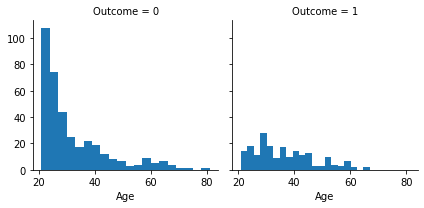

In [19]:
g = sns.FacetGrid(train, col='Outcome')
g.map(plt.hist, 'Age', bins=20)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    568 non-null    int64  
 1   Glucose        568 non-null    int64  
 2   BP             568 non-null    int64  
 3   SkinThickness  568 non-null    int64  
 4   Insulin        568 non-null    int64  
 5   BMI            568 non-null    float64
 6   DPF            568 non-null    float64
 7   Age            568 non-null    int64  
 8   Outcome        568 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.1 KB


In [21]:
train = train.drop(['Pregnancies','SkinThickness'], axis=1)
test = test.drop(['Pregnancies','SkinThickness'], axis=1)

In [22]:
# Let's investigate if you have non-numeric data left

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  568 non-null    int64  
 1   BP       568 non-null    int64  
 2   Insulin  568 non-null    int64  
 3   BMI      568 non-null    float64
 4   DPF      568 non-null    float64
 5   Age      568 non-null    int64  
 6   Outcome  568 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 31.2 KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  200 non-null    int64  
 1   BP       200 non-null    int64  
 2   Insulin  200 non-null    int64  
 3   BMI      200 non-null    float64
 4   DPF      200 non-null    float64
 5   Age      200 non-null    int64  
 6   Outcome  200 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.1 KB


In [24]:
X = np.array(train.drop(['Outcome'], 1).astype(float))

In [25]:
y = np.array(train['Outcome'])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  568 non-null    int64  
 1   BP       568 non-null    int64  
 2   Insulin  568 non-null    int64  
 3   BMI      568 non-null    float64
 4   DPF      568 non-null    float64
 5   Age      568 non-null    int64  
 6   Outcome  568 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 31.2 KB


In [27]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

In [28]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=2, n_jobs=1, precompute_distances='auto')

In [29]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6830985915492958


In [30]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [31]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=2, n_jobs=1, precompute_distances='auto')

In [32]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.31690140845070425


In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
x_fit = kmeans.fit(X_scaled)

In [35]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=2, n_jobs=1, precompute_distances='auto')

In [36]:
correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_scaled))

0.7095070422535211


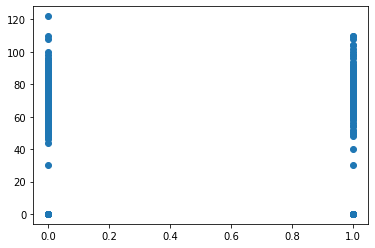

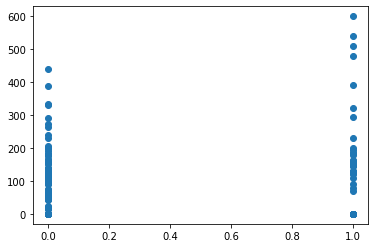

In [37]:
plt.scatter(train["Outcome"],train['BP'])
plt.show()
plt.scatter(test["Outcome"],test['Insulin'])
plt.show()

In [38]:
# Get the cluster centroids

print(np.array(kmeans.cluster_centers_))
    
# Get the cluster labels
print(kmeans.labels_)

[[0.53125734 0.5191098  0.06968154 0.45262624 0.1551633  0.09520349]
 [0.72165855 0.63286739 0.1313376  0.51040558 0.19872743 0.37202381]]
[1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1
 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1

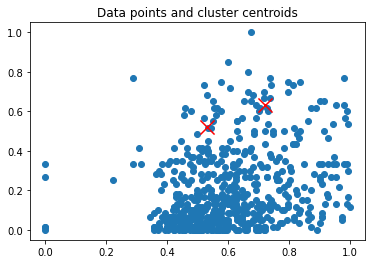

In [39]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X_scaled[:, 0], X_scaled[:, -1])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()